In [0]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /drive


In [0]:
loc = '/drive/My Drive/Colab Notebooks/'

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv(loc+'creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [107]:
df.shape

(284807, 31)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [109]:
val = pd.value_counts(df['Class'])
val

0    284315
1       492
Name: Class, dtype: int64

Text(0.5, 0, 'no if transaction')

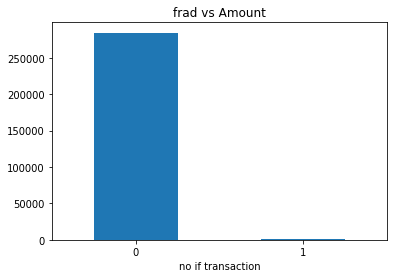

In [110]:
val.plot(kind = 'bar', rot=0)
plt.title('frad vs Amount')
plt.xlabel('no if transaction')

In [0]:
Fraud = df[df['Class']==1]
Correct = df[df['Class']==0]

In [112]:
len(Fraud), len(Correct)

(492, 284315)

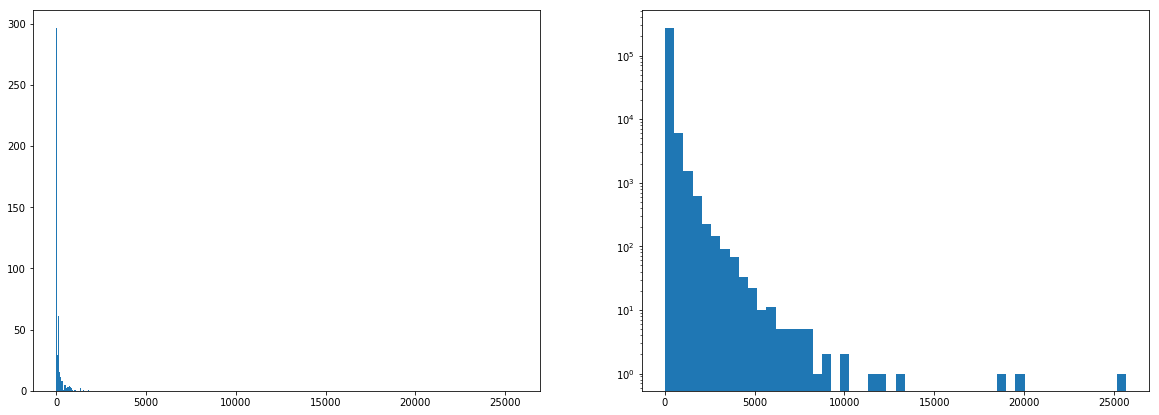

In [113]:
f, (a, b) = plt.subplots(1,2, sharex=True)
f.set_figwidth(20)
f.set_figheight(7)

a.hist(Fraud.Amount, bins=50)
a.set_label('Fraud')
b.hist(Correct.Amount, bins=50)
b.set_label('Normal')
plt.yscale('log')


Text(0.5, 1.0, 'Nornal Trasaction (Time vs amount )')

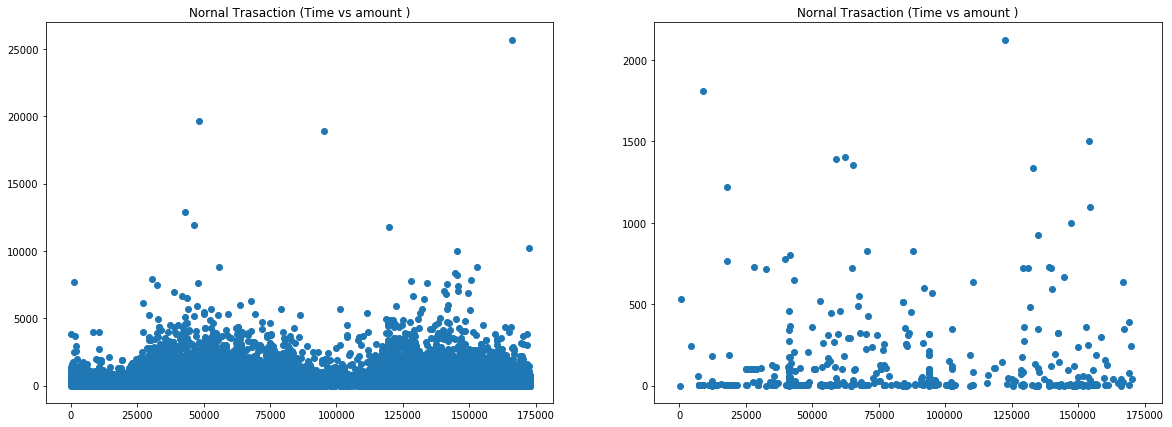

In [114]:
f1, (a1, b1) = plt.subplots(1, 2, sharex=True)
f1.set_figwidth(20)
f1.set_figheight(7)

a1.scatter(Correct.Time, Correct.Amount)
a1.set_title('Nornal Trasaction (Time vs amount )')

b1.scatter(Fraud.Time, Fraud.Amount)
b1.set_title('Nornal Trasaction (Time vs amount )')

# **Scaling Data**

In [0]:
from sklearn.preprocessing import RobustScaler

In [0]:
rob_scale = RobustScaler()

In [0]:
df['amount'] = rob_scale.fit_transform(df['Amount'].values.reshape(-1,1))
df['time'] = rob_scale.fit_transform(df['Time'].values.reshape(-1, 1))


df.drop(['Time', 'Amount'],axis=1 , inplace=True)


In [118]:
#  Chnging the position of time and amount

Amount = df['amount']
Time = df['time']

df.drop(['time','amount'],1 , inplace=True)
df.insert(0, 'Time', Time)
df.insert(1, 'Amount', Amount)
df.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# Balancing Data

Since its a Balance data ie Normal Trancection are(99.82 %) and Fraud Transections(.17%) are so we are balancing the Data

```
```


By ***Under Sampling Data*** Techinque

In [129]:
df = df.sample(frac=1)
df.shape

(284807, 31)

In [130]:
# We ha fraud transaction define above
Normal = df[df['Class']==0][:492]
Normal.shape, Fraud.shape

((492, 31), (492, 31))

In [131]:
new_dist = pd.concat([Fraud, Normal])
new_dist.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Amount,Class,Time,V1,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V2,V20,V21,V22,V23,V24,V25,V26,V27,V28,V3,V4,V5,V6,V7,V8,V9
541,0.00,1,406.0,-2.312227,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,1.951992,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089
623,529.00,1,472.0,-3.043541,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,-3.157307,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953
4920,239.93,1,4462.0,-2.303350,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,1.759247,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253
6108,59.00,1,6986.0,-4.397974,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,1.358367,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768
6329,1.00,1,7519.0,1.234235,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,3.019740,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858


In [0]:
#  shuffle data
new_df = new_dist.sample(frac=1, random_state=42)

In [0]:
new_fraud = new_df[new_df['Class']==1]
new_normal = new_df[new_df['Class']==0]

In [136]:
new_val = pd.value_counts(new_df['Class'])
new_val

1    492
0    492
Name: Class, dtype: int64

Text(0, 0.5, 'No of transections')

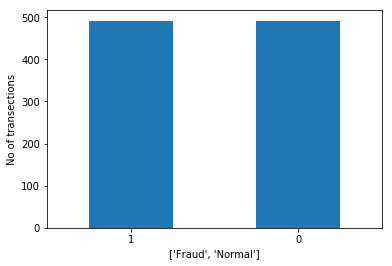

In [139]:
new_val.plot(kind = 'bar', rot=1)
plt.xlabel(['Fraud', 'Normal'])
plt.ylabel('No of transections')

Text(0.5, 1.0, 'Normal')

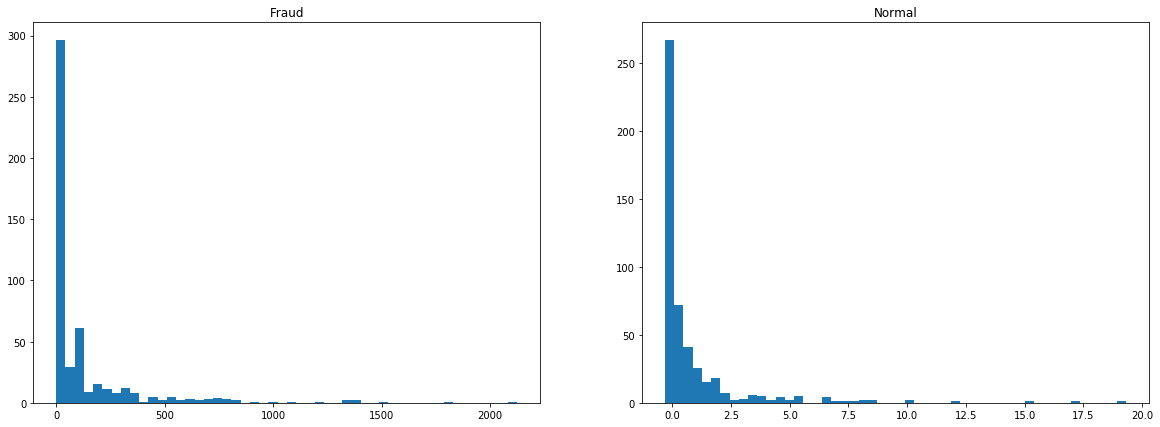

In [149]:
f,(a,b) = plt.subplots(1, 2)
f.set_figheight(7)
f.set_figwidth(20)

a.hist(new_fraud.Amount, bins=50)
a.set_title('Fraud')
b.hist(new_normal.Amount, bins=50)
b.set_title('Normal')

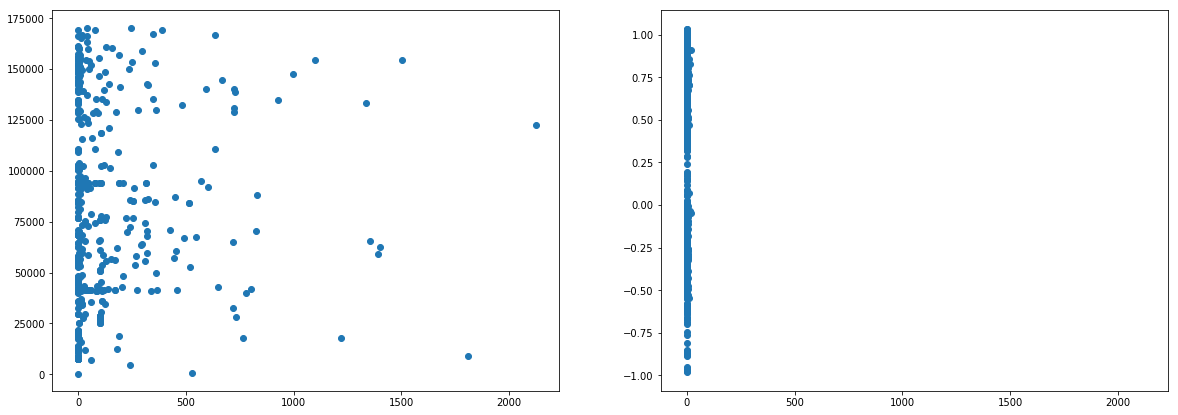

In [146]:
f,(a,b) = plt.subplots(1, 2, sharex=True)
f.set_figheight(7)
f.set_figwidth(20)

a.scatter(new_fraud.Amount, new_fraud.Time)
b.scatter(new_normal.Amount, new_normal.Time)

# Features Selection

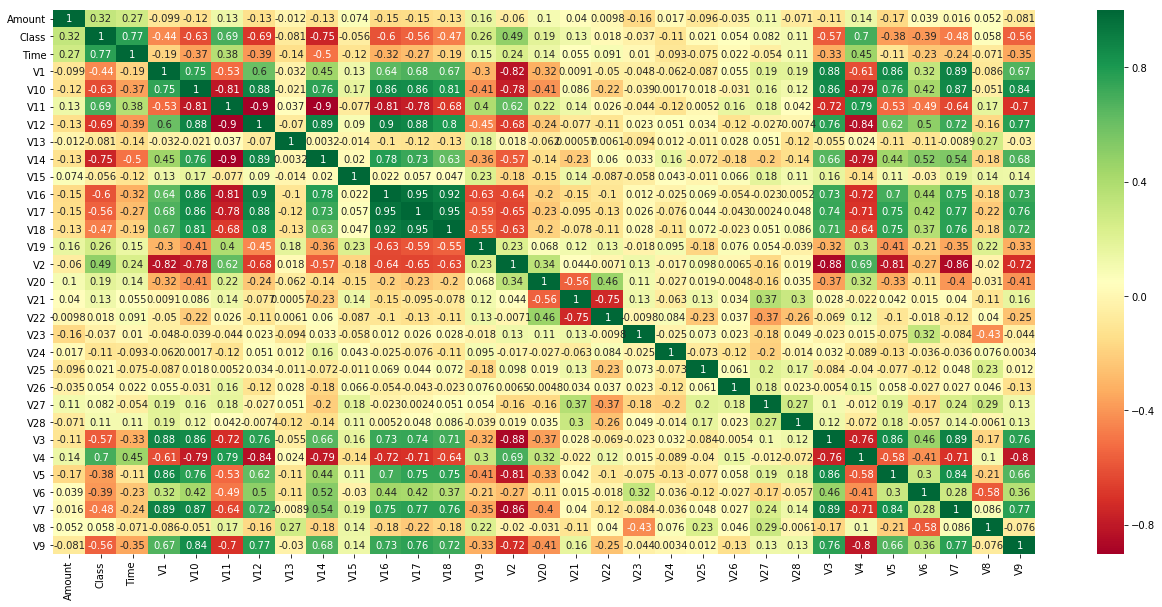

In [150]:
plt.figure(figsize = (22, 10))
sns.heatmap(new_df.corr(), cmap='RdYlGn', annot=True)

In [0]:
df.dropna(inplace=True)

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

In [0]:
Xs = np.array(new_df.drop(['Class'],1))
ys = np.array(new_df['Class'])

In [0]:
clf = ExtraTreesClassifier()


In [156]:
model = clf.fit(Xs, ys)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [157]:
model.feature_importances_

array([0.03222473, 0.28480403, 0.00143505, 0.08949218, 0.15292527,
       0.02097581, 0.00383445, 0.12477433, 0.00090224, 0.08862155,
       0.00958699, 0.02865245, 0.00344918, 0.00247892, 0.00355299,
       0.0029596 , 0.00321349, 0.00051137, 0.00238099, 0.0021917 ,
       0.00075577, 0.02424614, 0.00171738, 0.03327952, 0.06938117,
       0.00309712, 0.00183764, 0.00282323, 0.00111391, 0.00278079])

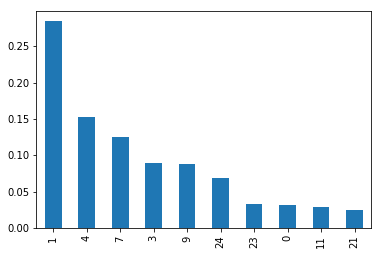

In [158]:
feature_importance = pd.Series(model.feature_importances_)
feature_importance.nlargest(10).plot(kind = 'bar')

In [160]:
outliners = len(new_fraud)/len(new_normal)
outliners

1.0

Text(0.5, 1.0, 'V10 vs Class Negative Correlation')

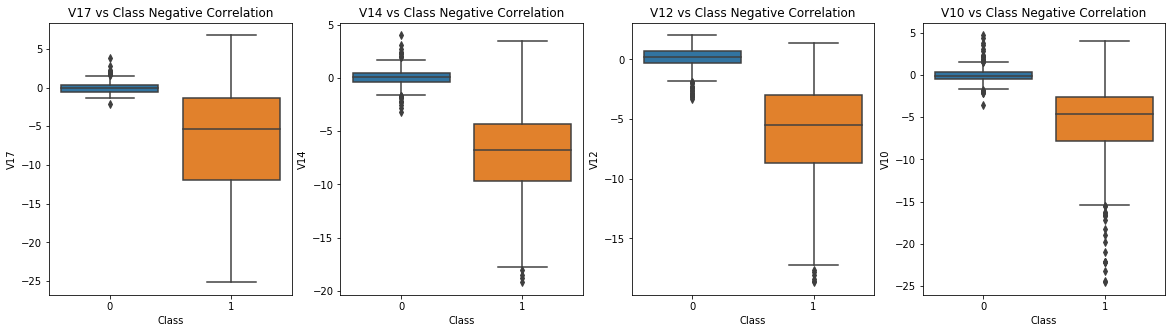

In [166]:
f, axes = plt.subplots(ncols=4, figsize=(20, 5))


sns.boxplot(x = new_df.Class, y = new_df.V17, data = new_df, ax = axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x = new_df.Class, y = new_df.V14, data = new_df, ax = axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x = new_df.Class, y = new_df.V12, data = new_df, ax = axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x = new_df.Class, y = new_df.V10, data = new_df, ax = axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')


Text(0.5, 1.0, 'V10 vs Class Positive Correlation')

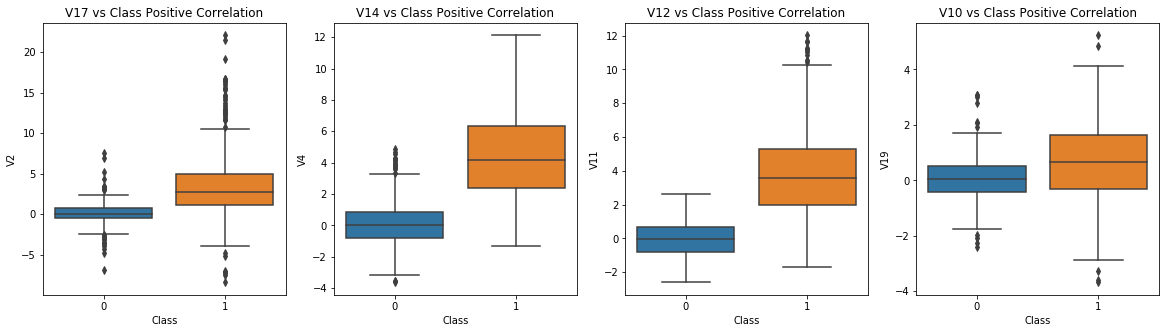

In [168]:
f, axes = plt.subplots(ncols=4, figsize=(20, 5))


sns.boxplot(x = new_df.Class, y = new_df.V2, data = new_df, ax = axes[0])
axes[0].set_title('V17 vs Class Positive Correlation')

sns.boxplot(x = new_df.Class, y = new_df.V4, data = new_df, ax = axes[1])
axes[1].set_title('V14 vs Class Positive Correlation')

sns.boxplot(x = new_df.Class, y = new_df.V11, data = new_df, ax = axes[2])
axes[2].set_title('V12 vs Class Positive Correlation')

sns.boxplot(x = new_df.Class, y = new_df.V19, data = new_df, ax = axes[3])
axes[3].set_title('V10 vs Class Positive Correlation')


# Model , Train and Test

In [0]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [0]:
Xs = np.array(new_df.drop(['Class'],1))
ys = np.array(new_df['Class'])

In [0]:
X_train, X_test, y_train , y_test = train_test_split(Xs, ys, test_size = 0.2)

In [0]:
classifier = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
}


In [195]:
type(classifier)

dict

In [196]:
from sklearn.model_selection import cross_val_score

for key, clf in classifier.items():
  clf.fit(X_train, y_train)
  training_score = cross_val_score(clf, X_train, y_train, cv=5,)
 
  print('Clasifier:', key ,"Has a accuracy of ", round(training_score.mean(),2))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Clasifier: LogisiticRegression Has a accuracy of  0.76
Clasifier: KNearest Has a accuracy of  1.0
Clasifier: Support Vector Classifier Has a accuracy of  0.98


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
